In [1]:
require 'matplotlib/iruby'
Matplotlib::IRuby.activate

require 'pycall/import'
include PyCall::Import

pyimport :pandas, as: :pd
pyimport :seaborn, as: :sns

:sns

In [2]:
require 'benchmark'

true

In [3]:
n = 100_000
trials = 100
array = Array.new(n) { rand }
enum = array.each
method = []
runtime = []

[]

In [4]:
# Array#sum
trials.times do
  method << 'array.sum'
  runtime << Benchmark.realtime { array.sum }
end

100

In [5]:
# Array#sum
trials.times do
  method << 'enum.sum'
  runtime << Benchmark.realtime { enum.sum }
end

100

In [6]:
# Array#inject
trials.times do
  method << 'array.inject'
  runtime << Benchmark.realtime { array.inject :+ }
end

100

In [7]:
# Enumerable#inject
trials.times do
  method << 'enum.inject'
  runtime << Benchmark.realtime { enum.inject :+ }
end

100

In [8]:
# while
def while_sum(array)
  sum, i, cnt = 0, 0, array.length
  while i < cnt
    sum += array[i]
    i += 1
  end
  sum
end

trials.times do
  method << 'while'
  runtime << Benchmark.realtime { while_sum(array) }
end

100

In [9]:
df = pd.DataFrame.new(data: {method: method, runtime: runtime})
df.groupby('method').describe()

#<Object:0x007fd93f0727e8 @__pyptr__=#<PyCall::PyPtr:0x007fd93f0727c0 type=DataFrame addr=0x00000117195c50>>

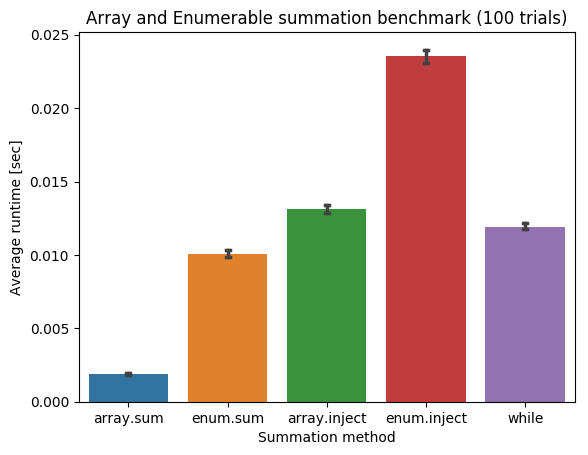

#<Object:0x007fd93f020088 @__pyptr__=#<PyCall::PyPtr:0x007fd93f020010 type=Text addr=0x000001176abe10>>

In [10]:
sns.barplot(x: 'method', y: 'runtime', data: df, errwidth: 2.5, capsize: 0.04)
plt = Matplotlib::Pyplot
plt.title("Array and Enumerable summation benchmark (#{trials} trials)")
plt.xlabel("Summation method")
plt.ylabel("Average runtime [sec]")